# Parti 1 : 

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si

1 . La solution de cette EDS est : $S_t = S_0 e^{((\mu - \frac{\sigma^2}{2})t + \sigma W_t)}$

2 . On peut poser $Y_{n+1} = Y_n + \mu Y_n (t_{n+1} - t_n) + \sigma Y_n (W_{t_{n+1}} - W_{t_{n}})$

In [ ]:
def sol(t, S0, r, sig, W):
    """
    Exact solution of the EDS dS = r*S*dt + sig*S*dW
        S0: initial value of S
        r: drift term
        sig: diffusion term
        W: Brownian motion at time t
    """
    return S0 * np.exp((r - 0.5 * sig**2) * t + sig * W)

def sol_app(t, S0, r, sig, dW):
    """
    Approximate solution of the EDS dS = r*S*dt + sig*S*dW
        S0: initial value of S
        r: drift term
        sig: diffusion term
        dW: increments of Brownian motion at time t
    """
    
    S = np.zeros(len(t))
    S[0] = S0
    for i in range(0, len(t)-1):
        S[i+1] = S[i] + r * S[i] * (t[i+1] - t[i]) + sig * S[i] * dW[i]
    return S

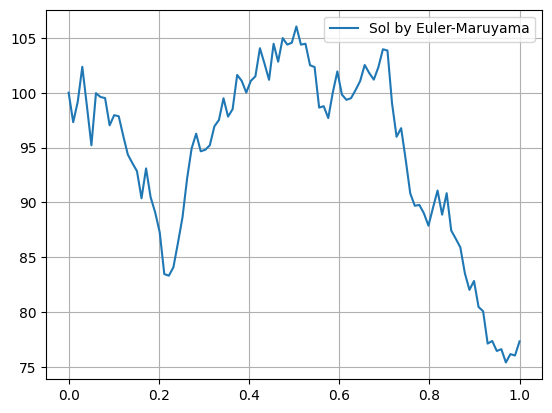

In [123]:
# Parameters
S0 = 100
sig = 0.2
r = 0.05
T = 1
t = np.linspace(0, T, 100)
dt = T / len(t)
dW = np.random.normal(0, np.sqrt(dt), len(t)) 

# Plot of the approximate solution
plt.plot(t, sol_app(t, S0, r, sig, dW), label='Sol by Euler-Maruyama')
plt.legend()
plt.grid()
plt.show()

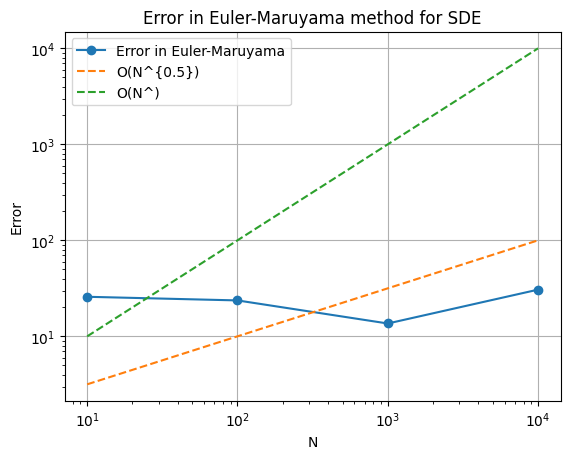

In [ ]:
# Parameters
N =  np.array([10,100,1000,10000])

# Error in Euler-Maruyama method
err = []
for n in N:
    dt = T/n
    t = np.linspace(0, T, n)
    dW = np.random.normal(0, np.sqrt(dt), len(t))


    S_exact = sol(T, S0, r, sig, dW)
    S_app = sol_app(t, S0, r, sig, dW)
    err.append(np.max(abs(S_exact - S_app)))  

# Plot of the error
plt.loglog(N, err,'o-', label='Error in Euler-Maruyama')
plt.loglog(N, N**(0.5), '--', label='O(N^{0.5})')
plt.loglog(N, N, '--', label='O(N^)')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error in Euler-Maruyama method for SDE')
plt.legend()
plt.grid()
plt.show()


# Partie 2 :

1 . $dS_t = r S_t dt + \sigma S_t d \~{W_t}$ avec $\~{W}$ un mouvement brownien sous la mesure de risque-neutre

2 .

In [ ]:
def sol(t, S0, r, sig, W):
    """
    Exact solution of the EDS dS = r*S*dt + sig*S*dW under the risk-neutral measure
        S0: initial value of S
        r: drift term
        sig: diffusion term
        W: Brownian motion at time t
    """
    return np.array(S0 * np.exp((r - 0.5 * sig**2) * t + sig * W))

def sol_app(t, S0, r, sig, W):
    """
    Approximate solution of the EDS dS = r*S*dt + sig*S*dW under the risk-neutral measure
        S0: initial value of S
        r: drift term
        sig: diffusion term
        W: Brownian motion at time t
    """
    S = np.zeros(len(t))
    S[0] = S0
    for i in range(0, len(t)-1):
        S[i+1] = S[i] + r * S[i] * (t[i+1] - t[i]) + sig * S[i] * dW[i]
    return S

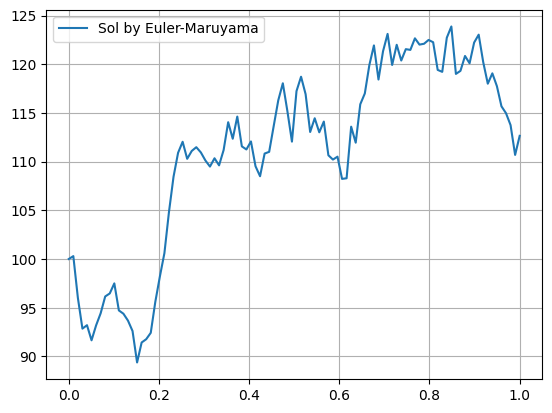

In [ ]:
# Parameters
S0 = 100
sig = 0.2
r = 0.05
T = 1
t = np.linspace(0, T, 100)
dt = T/len(t)
dW = np.random.normal(0, np.sqrt(dt), len(t))   

# Plot of the approximate solution under the risk-neutral measure
plt.plot(t, sol_app(t, S0, r, sig, dW), label='Sol by Euler-Maruyama')
plt.legend()
plt.grid()
plt.show()

3 .

In [ ]:
def overbarrier(sol, B):
    """
    Check if the solution of the SDE is above the barrier B at any time t
        sol: solution of the SDE
        B: barrier level
    """
    return np.any(sol > B)     

False


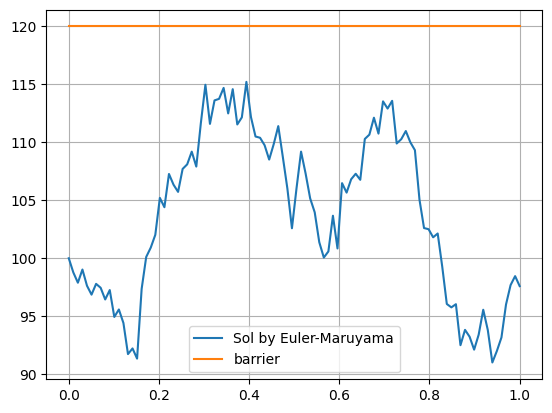

In [ ]:
# Parameters
B = 120
t = np.linspace(0, T, 100)
dt = T/len(t)
dW = np.random.normal(0, np.sqrt(dt), len(t))

s = sol_app(t, S0, r, sig, dW)
print(overbarrier(s, B))

# Plot of the approximate solution with barrier
plt.plot(t, s, label='Sol by Euler-Maruyama')
plt.plot(t, B * np.ones_like(t), label='barrier')
plt.legend()
plt.grid()
plt.show()

4 .

In [ ]:
# Parameters
K = 100
t = np.linspace(0, T, 100)
dt = T/len(t)
dW = np.random.normal(0, np.sqrt(dt), len(t))  

s = sol_app(t, S0, r, sig, dW)

# Function to compute the payoff of a barrier option
def pay(s, K, B):
    """
    Compute the payoff of a barrier option
        s: solution of the SDE
        K: strike price
        B: barrier level
    """
    if overbarrier(s, B):
        return max(s[-1] - K, 0)
    else:
        return 0
    
print("Payoff at maturity:", pay(s, K, B))

Payoff at maturity: 3.8695142139484773


5 . 

In [ ]:
N = 100

payoffs = []
for _ in range(1000):
    t = np.linspace(0, T, N)
    dt = T/N
    dW = np.random.normal(0, np.sqrt(dt), len(t)) 

    s = sol_app(t, S0, r, sig, dW)
    payoffs.append(pay(s, K, B))
    

mean_payoff = np.mean(payoffs)
print("Estimation du prix de l'option :", mean_payoff)



Estimation du prix de l'option : 1.4527763133612186


6 .

In [92]:
N = 100
payoffs = []
for _ in range(1000):
    t = np.linspace(0, T, N)
    dt = T/N
    dW = np.random.normal(0, np.sqrt(dt), len(t)) 

    s = sol_app(t, S0, r, sig, dW)
    payoffs.append(pay(s, K, B))

mean_payoff = np.mean(payoffs)
print("Estimation du prix de l'option :", mean_payoff)

def Cbs(S0, K, r, T, sig):
    d1 = 1/(sig * np.sqrt(T)) * (np.log(S0/K) + (r + 0.5 * sig**2) * T)
    d2 = d1 - sig * np.sqrt(T)
    return S0 * si.norm.cdf(d1) - K * np.exp(-r*T) * si.norm.cdf(d2)

def sol_analytic(t, S0, r, sig, W):
    Cbs_value = Cbs(S0, K, r, T, sig)
    Cbs2_value = Cbs(B**2 / S0, K, r, T, sig)
    lam = (r + sig**2 / 2) / sig**2
    return Cbs_value - Cbs_value*(S0/B)**(2*lam) + (S0/B)**(lam-1) * (Cbs2_value - (S0/B)**2 * Cbs2_value)

print("Black-Scholes price:", sol_analytic(T, S0, r, sig, dW))


Estimation du prix de l'option : 1.3441974073632965
Black-Scholes price: 17.998941120931207


# Partie 3

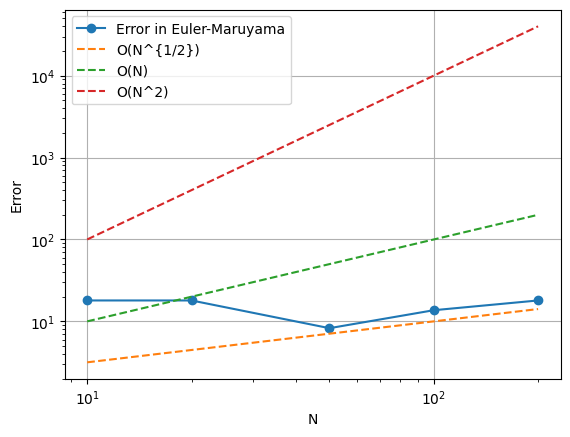

In [93]:
N = np.array([10,20,50,100,200])
err = []
payoffs_ex = []
payoffs_app = []
for n in N:
    dt = T/n
    t = np.linspace(0, T, n)
    dW = np.random.normal(0, np.sqrt(dt), len(t))

    s = sol_app(t, S0, r, sig, dW)

    err.append(np.max(np.abs(pay(s, K, B) - sol_analytic(T, S0, r, sig, dW))))

plt.loglog(N, err,'o-', label='Error in Euler-Maruyama')
plt.loglog(N, N**(1/2), '--', label='O(N^{1/2})')
plt.loglog(N, N, '--', label='O(N)')
plt.loglog(N, N**2, '--', label='O(N^2)')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


6 .

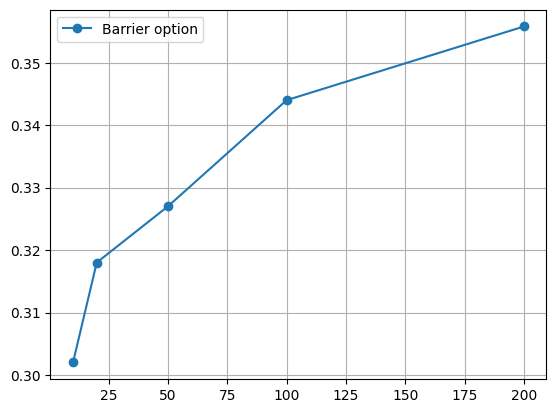

In [122]:
N = np.array([10,20,50,100,200])

evolution = []
above = []
for n in N:
    for _ in range(1000):
        dt = T/n
        t = np.linspace(0, T, n)
        dW = np.random.normal(0, np.sqrt(dt), len(t))

        s = sol_app(t, S0, r, sig, dW)
        if overbarrier(s, B):
            above.append(1)
        else:
            above.append(0)
    evolution.append(np.mean(above))

plt.plot(N, evolution, 'o-', label='Barrier option')
plt.legend()
plt.grid()
plt.show()


Plus le nombre de pas de discretisation augmente plus on detecte de franchissement de la barrière car 